In [2]:
import geopandas as gpd

In [3]:
from shapely.geometry import LineString
from shapely.ops import snap

In [4]:
coord = [(0,0),(1,0.3),(1,0), (2,0), (1.8,-1), (2,-1), (2,-3)]
line1 = LineString(coord)

coord2 = [(1,0.3), (1,1), (2,1)]
line2 = LineString(coord2)

coord3 = [(1.8,-1), (0,-2.5)]
line3 = LineString(coord3)

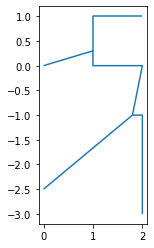

In [5]:
gdf = gpd.GeoDataFrame([line1,line2,line3],columns=["geometry"])
gdf.plot()

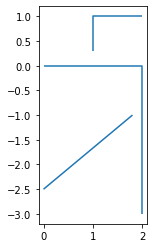

In [6]:
gdf.simplify(0.3, preserve_topology=True).plot()

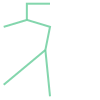

In [11]:
gdf_union = gdf.unary_union
gdf_union_Spl = gdf_union.simplify(0.3, preserve_topology=True)
gdf_union_Spl

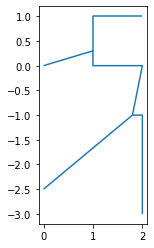

In [8]:
gdf_union = gdf.unary_union
gdf.geometry = gdf.geometry.apply(lambda x: snap(x, gdf_union, 0.1))
gdf.plot()

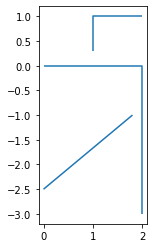

In [9]:
gdf.simplify(0.3, preserve_topology=True).plot()

New lines in the MultiLineString: 
 5


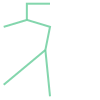

In [17]:
print("New lines in the MultiLineString: \n", len(gdf_union_Spl))
gdf_union_Spl

> **They are considered as lines from intersection to intersection!** 